In [96]:
########################################################################################################################################
########################################################################################################################################
############# The droplet evaporation process in the presence of solute-induced concentration gradients inside the droplet #############
################################# (The numerical method described in Supporting Information section B) #################################
########################################################################################################################################
########################################################################################################################################

import numpy as np
from scipy import constants
from cmath import sqrt
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.integrate import odeint

#################### numerical constants used in calculations ####################
# thermal energy:
kbt= constants.Boltzmann * (273.15+25)
# water diffusion constant in air:
D_w = 2.5*10**-5
# water diffusion constant in liquid water:
D_wl = 2.3e-9
# liquid water molecular volume:
v_w = 3*10**-29
# saturated vapor water concentration:
c_g = 7.69*10**23
# saturated vapor water concentration at T=0K:
c_g0 = 1.62*10**23
# molecular evaporation enthalpy of water:
h_ev = 7.3*10**-20
# water molecular mass:
m_w = 2.99*10**-26
# liquid water density:
rho = 997
# nominal gravitational constant:
g = 9.81
# density of air:
rho_air = 1.18
# heat conductivity of air:
lamb_air = 0.026
# condensation reaction rate constant:
k_c = (kbt/m_w)**0.5

# numerical prefactors:
alpha = D_wl/(D_w*c_g*v_w)
eps_T = (D_w*c_g*h_ev)/lamb_air
eps_c = (c_g-c_g0)/(c_g*(25-0))

#################### inputs ####################
# initial droplet radius:
R_0 = 50e-6
# water activity coefficient:
gama = 1
# relative humidity:
RH = 0.5
# initial solute volume fraction:
phi_0 = 0.01

Text(0, 0.5, '$R_i/R$')

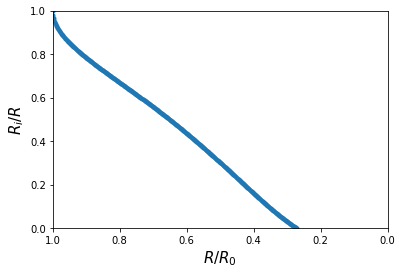

In [97]:
####################################################################################
#################### calclation of R_i/R as a function of R/R_0 ####################
####################################################################################

R_R0 = []
Ri_R = []
m = []
n = []
delT=[]
delT2=[]

nn = 1
for i in range(1000):
    if nn > 0:
        # solution of Eq. B23:
        R_star = 1-(0.001*i)
        f = (2*phi_0*(1-R_star**-3))/(1-phi_0-(RH/gama))
        mm = f*(alpha/gama-1+alpha*eps_c*eps_T*(1-phi_0))-3
        nn = f+2
        coeff = [1, 0, mm, nn]
        
        if nn > 0:
            R_R0.append(R_star)
            m.append(mm)
            n.append(nn)
            Ri_R.append(np.roots(coeff)[2])

plt.plot (R_R0 , Ri_R, '.')    
plt.xlim(right=0)
plt.xlim(left=1)
plt.ylim(bottom=0)
plt.ylim(top=1)
plt.xlabel("$R/R_0$", fontsize=15)
plt.ylabel("$R_i/R$", fontsize=15)

[ 1.12027082e+04 -6.81748207e+04  1.83468319e+05 -2.87261676e+05
  2.89533586e+05 -1.96128191e+05  9.03665316e+04 -2.79561064e+04
  5.55927526e+03 -6.41105936e+02  3.24573136e+01  1.00000000e+00]


Text(0, 0.5, '$R_i/R$')

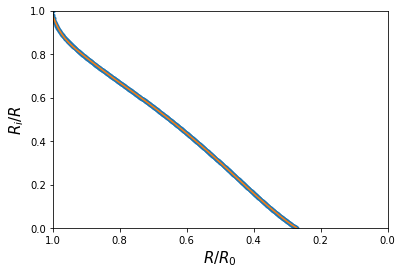

In [98]:
###############################################################################
#################### fitting suitable function to the data ####################
###############################################################################

# different fit functions are defined and used, depending on which one fits the data best
def func(x, a1, a2, a3, a4, a5, a6, a7, a8, a9, a10, a11, a12):
    return a1*(x**10)+a2*(x**9)+a3*(x**8)+a4*(x**7)+a5*(x**6)+a6*(x**5)+a7*(x**4)+a8*(x**3)+a9*(x**2)+a10*(x**1)+a11
#     return a1*(x**a2)+a3*(x**a4)+a5*(x**a6)+a7*(x**a8)
#     return a1*np.exp(x**a2)+a3*np.exp(x**a4)+a5*np.exp(x**a6)+a7*np.exp(x**a8)


popt, pcov = optimize.curve_fit(func, R_R0, Ri_R)
print(popt)

R_i_R_fit = []
for k, value in enumerate(R_R0):
    R_i_R_fit.append (popt[0]*(R_R0[k]**10)+popt[1]*(R_R0[k]**9)+popt[2]*(R_R0[k]**8)+popt[3]*(R_R0[k]**7)+popt[4]*(R_R0[k]**6)+popt[5]*(R_R0[k]**5)+popt[6]*(R_R0[k]**4)+popt[7]*(R_R0[k]**3)+popt[8]*(R_R0[k]**2)+popt[9]*(R_R0[k]**1)+popt[10])
#     R_i_R_fit.append (popt[0]*(R_R0[k]**popt[1])+popt[2]*(R_R0[k]**popt[3])+popt[4]*(R_R0[k]**popt[5])+popt[6]*(R_R0[k]**popt[7]))
#     R_i_R_fit.append (popt[0]*np.exp(R_R0[k]**popt[1])+popt[2]*np.exp(R_R0[k]**popt[3])+popt[4]*np.exp(R_R0[k]**popt[5])+popt[6]*np.exp(R_R0[k]**popt[7]))


plt.plot (R_R0 , Ri_R, '.')    
plt.plot (R_R0, R_i_R_fit)
plt.xlim(right=0)
plt.xlim(left=1)
plt.ylim(bottom=0)
plt.ylim(top=1)
plt.xlabel("$R/R_0$", fontsize=15)
plt.ylabel("$R_i/R$", fontsize=15)

(0.0, 20)

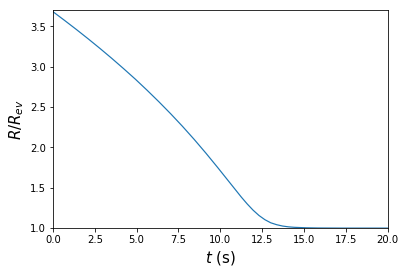

In [99]:
############################################################
#################### calclation of R(t) ####################
############################################################

# equilibrium droplet radius:
R_ev = R_0*(phi_0/(1-RH/gama))**(1/3)

# evaporation-cooling factor:
psi_c = alpha*eps_c*eps_T*(1-phi_0)

# solution of Eq. B25:
def dy_dx(y, x):
    return -(D_wl*(1-phi_0-(RH/gama)))/(y*(alpha/gama+psi_c-(1-1/(popt[0]*((y/R_0)**10)+popt[1]*((y/R_0)**9)+popt[2]*((y/R_0)**8)+popt[3]*((y/R_0)**7)+popt[4]*((y/R_0)**6)+popt[5]*((y/R_0)**5)+popt[6]*((y/R_0)**4)+popt[7]*((y/R_0)**3)+popt[8]*((y/R_0)**2)+popt[9]*(y/R_0)+popt[10]))))
#     return -(D_wl*(1-phi_0-(RH/gama)))/(y*(alpha/gama-1+psi_c+1/(popt[0]*((y/R_0)**popt[1])+popt[2]*((y/R_0)**popt[3])+popt[4]*((y/R_0)**popt[5])+popt[6]*((y/R_0)**popt[7]))))
#     return -(D_wl*(1-phi_0-(RH/gama)))/(y*(alpha/gama+psi_c-(1-1/(popt[0]*np.exp((y/R_0)**popt[1])+popt[2]*np.exp((y/R_0)**popt[3])+popt[4]*np.exp((y/R_0)**popt[5])+popt[6]*np.exp((y/R_0)**popt[7])))))

t = np.linspace(0,70,num=200)
Rt = odeint(dy_dx, R_0, t)
Rt = np.array(Rt).flatten()
Rt_Rev = np.array(Rt).flatten()/R_ev


plt.plot(t, Rt_Rev, linewidth=1.2)
plt.xlabel("$t$ (s)", fontsize=15)
plt.ylabel("$R/R_{ev}$", fontsize=15)
plt.ylim(bottom=1)
plt.ylim(top=3.7)
plt.xlim(left=0.0)
plt.xlim(right=20)

In [100]:
############################################################################
#################### calclation of the evaporation time ####################
############################################################################

#################### the time of the first drying stage ####################

# the radius of the internal core in the second drying stage:
epsilon = 1e-9

# droplet radius at the end of the first drying stage (obtained from Eq. B23):
R_11 = R_0*(1+((epsilon**3-(3*epsilon)+2)/(((alpha/gama)-1)*epsilon+1)*((1-phi_0-(RH/gama))/(2*phi_0))))**(-1/3)
R_111 = R_0

crit = 1
for f, value in enumerate(t):
    if crit > 0:
        if (Rt[f]-R_11)/Rt[f] < 0.01:
            tau_1 = value
            crit = -1
            R_111 = Rt[f]
            
print (f'\u03C41={tau_1}')

#################### the time of the second drying stage ####################

# solution of Eq. B32:
mio = (-epsilon**3+(3*epsilon)-2)/(2*(alpha*epsilon-gama*(epsilon-1)+alpha*gama*epsilon*eps_c*eps_T))

def dyy_dxx(y, x):
    return -(D_w*c_g*v_w/y)*((gama*(1-phi_0*(R_0/y)**3)-RH)/((1-(gama/alpha)*(1-(1/epsilon)))*(1+gama*mio)+gama*eps_c*eps_T*(RH*mio+(1-phi_0*(R_0/y)**3))))
t1 = np.linspace(0,500,num=10000000)
Rt1 = odeint(dyy_dxx, R_111, t1)
Rt1 = np.array(Rt1).flatten()


crit = 1
for e, value in enumerate(t1):
    if crit > 0:
        if (Rt1[e]-R_ev)/Rt1[e] < 0.01:
            tau_2 = value           
            crit=-1

print (f'\u03C42={tau_2}')


#################### evaporation time ####################
tau_ev = tau_1+tau_2
print (f'\u03C4=\u03C41+\u03C42={tau_ev}')


τ1=14.42211055276382
τ2=0.0
τ=τ1+τ2=14.42211055276382
